<h3>Heart Disease Prediction</h3>
<h5>The Heart Disease Prediction Project is a machine learning project<br> aimed at developing a model to predict the presence of heart disease <br> in patients based on various health-related features.</h5>

<h3>Heart Dataset </h3>
<h5>The dataset used in this project contains information about patients<br>' age, gender, chest pain type, resting blood pressure, cholesterol levels,<br> fasting blood sugar, electrocardiographic results, maximum heart rate achieved,<br> exercise-induced angina, and other relevant attributes. </h5>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# Load dataset
df = pd.read_csv("heart.csv")

In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
# dataset size (rows, columns)
print(f"Rows : {df.shape[0]}")
print(f"Columns : {df.shape[1]}")

Rows : 303
Columns : 14


In [ ]:
# Summary statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Describe dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB




```
Column Descriptions

    age: Patient's age.

    sex: Patient's gender.
        0: Female (F).
        1: Male (M).

    cp: Chest pain type.
        1: Typical angina.
        2: Atypical angina.
        3: Non-anginal pain.
        4: Asymptomatic.

    trtbps: Resting blood pressure (in mm Hg).

    chol: Cholesterol in mg/dl obtained via IMC sensor (Serum cholesterol in mg/dl).

    fbs: Fasting blood sugar level.
        1: Fasting blood sugar > 120 mg/dl.
        0: Fasting blood sugar <= 120 mg/dl.

    rest_ecg: Resting electrocardiographic results.
        0: Normal.
        1: ST-T wave abnormality (inverted T wave and/or ST segment elevation or depression > 0.05 mV).
        2: Probable or definite left ventricular hypertrophy by Estes' criteria.

    thalach: Maximum heart rate achieved.
        0: Lower chance of heart attack.
        1: Higher chance of heart attack.

    exng: Exercise induced angina.
        1: Yes.
        0: No.

    Oldpeak: ST depression induced by exercise relative to rest.

```



<h3> Data Exploration and Preprocessing </h3>
<h5> to gain insights into the dataset and identify any data quality issues.<br> During this phase, data cleaning steps will be performed to handle missing values and correct any anomalies in certain columns<br> such as 'caa' and 'thall', where incorrect entries were observed.</h5>

In [ ]:
# check if there are null values, luckily none were found ^_^.
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# there is a duplicate record
df.duplicated().sum()

np.int64(1)

In [ ]:
 df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
# we will remove it so as not to overfit
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum() # No duplicate

np.int64(0)

<h3> Separate features and target </h3>

In [ ]:
X = df.drop('target', axis=1) # independent variable vector (features)
y = df['target'] # dependent variable vector (target)

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<h3> Train the Model (Logistic Regression) </h3>
<h5> Logistic Regression is a machine learning model that helps predict whether a patient has heart disease or not based on their health data </h5>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Initialize and train
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

<h3> Evaluate the Model </h3>
<h5> The performance of each model will be evaluated using various metrics <br> such as accuracy, precision, recall, and F1-score. </h5>

In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61





```
1) Accuracy: The percentage of correct predictions.
```



In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy : {accuracy:.2f}")

The accuracy : 0.82




```
2) Confusion Matrix
You can see what kinds of errors your model makes:

    False Negatives (missed disease) → very serious in medicine!

    False Positives (false alarms) → may cause stress, but less dangerous
```



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[24  5]
 [ 6 26]]




```
What Each Cell Means

    True Positive (TP): The model correctly predicts a patient has heart disease.

    True Negative (TN): The model correctly predicts a patient does not have heart disease.

    False Negative (FN): The model says the patient is healthy, but they actually have the disease. (WORST)

    False Positive (FP): The model says the patient has heart disease, but they don’t.

```



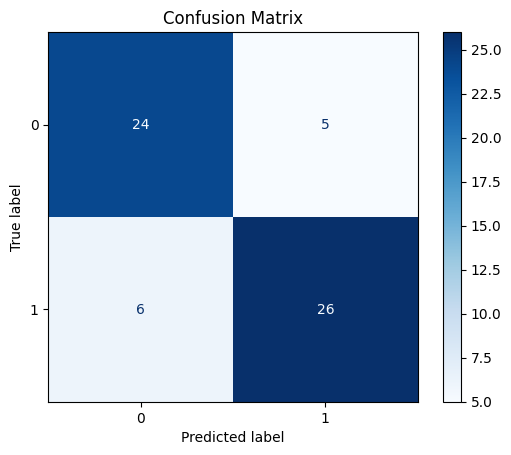

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



```
3) Recall (Sensitivity, In Medicine: Focus on Recall):
What % of actual positives did we catch?
In life-threatening conditions like heart disease:

    We prefer to catch everyone who might be sick (high recall)

    Even if we get a few false alarms (lower precision)
```





```
Recall (x) = How many of the actual positive cases the model correctly identified
Precision (y) = How many of the predicted positive cases are actually positive
```



In [ ]:
# Get prediction probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Get precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

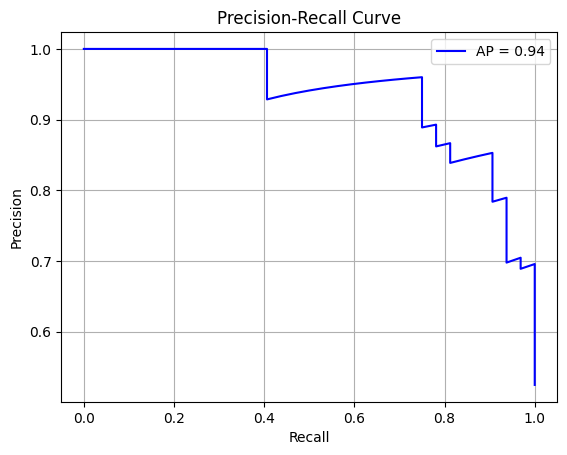

In [ ]:
# Plot Precision-Recall Curve
plt.plot(recall, precision, color='blue', label=f"AP = {avg_precision:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()



```
4) ROC Curve (Receiver Operating Characteristic) and AUC:
Shows the tradeoff between True Positive Rate and False Positive Rate at different thresholds.

AUC = Area Under Curve

0.5 = random guessing

1.0 = perfect model

> 0.8 = good

> 0.9 = excellent

```





```
True Positive Rate (Recall)
False Positive Rate (FPR) = How many of the actual negatives were predicted as positive
```



In [ ]:
# Get prediction probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

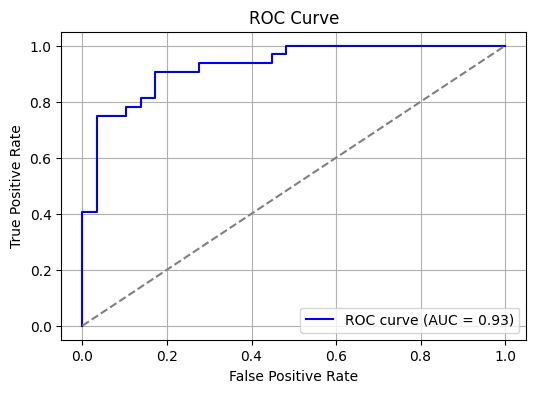

In [ ]:
# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

<h3> Patients Samples</h3>

In [ ]:
# New patient data (example values — adjust based on your dataset)
new_patient = [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]
column_names = X.columns

new_patient_df = pd.DataFrame(new_patient, columns=column_names)

# Now scale safely
new_patient_scaled = scaler.transform(new_patient_df)

# Predict
prediction = model.predict(new_patient_scaled)
probability = model.predict_proba(new_patient_scaled)

print(list(column_names))
print(new_patient)

print('-' * 30)

print(f"Prediction (0 = No Disease, 1 = Disease): {prediction[0]}")
print(f"Probability of Disease: {probability[0][1]:.4f}")

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
[[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]
------------------------------
Prediction (0 = No Disease, 1 = Disease): 1
Probability of Disease: 0.7823


In [ ]:
# Multiple patient samples (5 patients, 13 features each)
sample_patients = np.array([
    [45, 1, 2, 130, 240, 0, 1, 160, 0, 1.2, 1, 0, 2],
    [60, 0, 1, 140, 290, 1, 0, 150, 1, 2.4, 0, 1, 3],
    [35, 1, 0, 120, 180, 0, 1, 175, 0, 0.5, 2, 0, 1],
    [52, 1, 3, 150, 310, 0, 0, 140, 1, 3.1, 1, 2, 2],
    [28, 0, 0, 110, 170, 0, 1, 185, 0, 0.0, 2, 0, 1]
])

# Convert to DataFrame (if needed)
new_patients_df = pd.DataFrame(sample_patients, columns=X.columns)

# Scale the data
new_patients_scaled = scaler.transform(new_patients_df)

# Predict
predictions = model.predict(new_patients_scaled)
probabilities = model.predict_proba(new_patients_scaled)

# Print results
for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
    print(f"Patient {i+1}:")
    print(f"  Prediction: {'Disease (1)' if pred else 'No Disease (0)'}")
    print(f"  Probability of Disease: {prob[1]:.4f}")
    print("-" * 30)

Patient 1:
  Prediction: Disease (1)
  Probability of Disease: 0.8149
------------------------------
Patient 2:
  Prediction: No Disease (0)
  Probability of Disease: 0.0767
------------------------------
Patient 3:
  Prediction: Disease (1)
  Probability of Disease: 0.9603
------------------------------
Patient 4:
  Prediction: No Disease (0)
  Probability of Disease: 0.0402
------------------------------
Patient 5:
  Prediction: Disease (1)
  Probability of Disease: 0.9964
------------------------------


<h3> Conclusion </h3>
<h5> The Heart Disease Prediction Project aims to provide a valuable tool<br> for early detection and risk assessment of heart disease in patients<br> by machine learning techniques and thorough data analysis </h5>